Step 1: Import Libraries and Load Data

In [2]:
# Core Data Libraries
import pandas as pd
import numpy as np

# Scikit-learn (ML Library)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("Datasets/Admission_Predict.csv")

In [4]:
dataset.shape

(400, 9)

In [5]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Step 2: Data Preparation and Cleaning

In [6]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Step 3 & 4: Separate Features and Split Data

In [7]:
# Assuming your DataFrame is named 'dataset'
dataset.columns = dataset.columns.str.strip()

# Now, print the cleaned columns to verify the change:
print(dataset.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [8]:
# Features (X): The input data we use to predict
X = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]

# y (Target): The value we want to predict (Chance of Admit)
y = dataset['Chance of Admit']

# Split the data (80% for training, 20% for testing) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state=42 ensures reproducibility 
)

print(f"X_train shape:{X_train.shape}")
print(f"X_test shape:{X_test.shape}")

X_train shape:(320, 7)
X_test shape:(80, 7)


Step 5: Model Selection and Training

In [9]:
#Train the Model

model = RandomForestRegressor(random_state=42) # A common, robust non-linear model

# 2. Train the Model (Fit the training data) 
model.fit(X_train, y_train)

print("Random Forest Regressor Model trained successfully!")

Random Forest Regressor Model trained successfully!


Step 6: Evaluation and Interpretation

In [10]:
# 1. Make Predictions on the Test Set 
y_pred = model.predict(X_test)

# 2. Calculate Evaluation Metrics 

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0498
R-squared (R2) Score: 0.8066


Step 7: Visualization

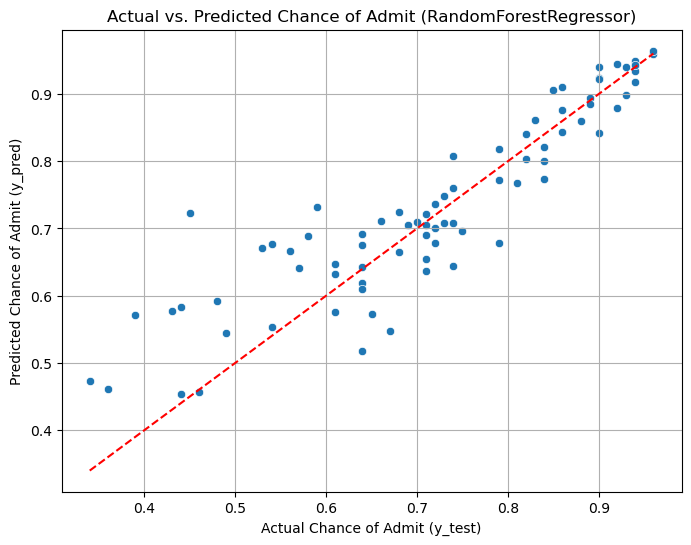

In [11]:
# Visualize the results: Actual vs. Predicted [cite: 97]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred) 

# Plot the ideal line (Actual = Predicted) [cite: 100]
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 

# Corrected labels reflecting the variable being plotted
plt.xlabel("Actual Chance of Admit (y_test)")
plt.ylabel("Predicted Chance of Admit (y_pred)")

# Use the best title for clarity
plt.title("Actual vs. Predicted Chance of Admit (RandomForestRegressor)") 
plt.grid(True)
plt.show()

Section: User Input - New applicants can enter their details here to predict their chance of admission into the graduate program.


In [1]:
# Define the data for the new applicant
new_applicant_data = {
    'GRE Score': [100], 
    'TOEFL Score': [120], 
    'University Rating': [5], 
    'SOP': [5], 
    'LOR': [5], 
    'CGPA': [4.1], 
    'Research': [1]
}

# Create a DataFrame for the prediction
new_applicant_df = pd.DataFrame(new_applicant_data)

print("Applicant Data Ready for Prediction:")
print(new_applicant_df)

NameError: name 'pd' is not defined

In [180]:
# Assuming 'model' is your trained RandomForestRegressor object
predicted_chance = model.predict(new_applicant_df)

# Print the result (the prediction is a probability between 0 and 1)
print(f"\nThe Predicted Chance of Admit is: {predicted_chance[0]:.4f}")


The Predicted Chance of Admit is: 0.8872


In [ ]:
select *from student